### Tugas Kelompok

### Latar Belakang
    Banyak konsol game yang beredar membuat kami untuk mencari data penjualan game di berbagai konsol. Berbagai macam jenis game yang beredar di setiap negara memiliki jumlah yang berbeda-beda, kami akan menganalisa penjualan game di bebagai negara tersebut dan melihat peluang konsol apa saja yang laku dan game apa saja yang baik untuk di kembangkan kedepanya.

    1. Memberi rekomendasi untuk game apa saja yang baik untuk di kembangkan.
    2. Memberi rekomendasi untuk meningkatkan penjualan konsol di berbagai negara. 

### Define Goals
    1. Memberi rekomendasi untuk game apa saja yang baik untuk di kembangkan.
    2. Memberi rekomendasi untuk meningkatkan penjualan konsol di berbagai negara. 

### Find Dataset
    - Sourcing & Riset
    https://www.kaggle.com/gregorut/videogamesales

=================Teknikal ====================
- Pengecekan Tipe Data (v)
- Pengecekan Missing Value dan Gimana Handling nya, 80%an NULL/NaN, (v)
- Describe Data
- Pengecekan Data Outliers (via Hitungan Rumus atau via Boxplot) ==> Handling nya Outliers
- Pengecekan dan Ekstraksi Kolom yg bertipe Date time / Tanggal (opsi)
- Analisa Data ==> 
1. Univariate ==> Analisa 1 kolom
2. Bivariate - Multivariate ==> Dua Kolom atau Lebih ==> Crosstab, Pivot Table, Group by termasuk Subsetting
3. Temukan Insight Data
- Data Visualization
1. Univariate
2. Bivariate - Multivariate
3. Temukan Insight Data
- Kesimpulan - Rekomendasi
    
=======Modelling ======
- Kesimpulan - Rekomendasi

In [1]:
import numpy as np
import pandas as pd

- kita menentukan mario bros paling bagus dilanjutkan di plaform apa,platform super mario bros enaknya dimana? kalo pengen untung jualnya dimana? contohnya ke jepang
karena pasarnya paling bbesar itu di europe

- target kita di publisher di drop baris yang publishernya kosong
- PUBLISHER DI DROP PER BARIS NYA KARENA , nilainya tidak bisa dikarang karang
- yang year drop aja, karena hanya 2 persen dari data total

In [2]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
round(((df['Year'].isnull().sum())/(len(df)))*100)

2.0

## drop column because it has only 2 percent

In [7]:
#df.drop(['Year'],axis=1,inplace=True)

In [8]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## drop row that has null value in publisher

In [9]:
null_columns=df.columns[df.isnull().any()]

In [10]:
print(df[df["Publisher"].isnull()][null_columns])

         Year Publisher
470       NaN       NaN
1303      NaN       NaN
1662   2007.0       NaN
2222   2005.0       NaN
3159   2004.0       NaN
3166   2004.0       NaN
3766   2004.0       NaN
4145      NaN       NaN
4526   2004.0       NaN
4635   2004.0       NaN
5302      NaN       NaN
5647   2005.0       NaN
6272      NaN       NaN
6437   2004.0       NaN
6562   2004.0       NaN
6648   2004.0       NaN
6849   2004.0       NaN
7208   2004.0       NaN
7351      NaN       NaN
7470   2004.0       NaN
7953   2004.0       NaN
8330   2004.0       NaN
8341   2004.0       NaN
8368   2004.0       NaN
8503   2011.0       NaN
8770   2005.0       NaN
8848   2004.0       NaN
8896   2004.0       NaN
9517   2010.0       NaN
9749      NaN       NaN
10382  2004.0       NaN
10494     NaN       NaN
11076     NaN       NaN
11526  2004.0       NaN
12487     NaN       NaN
12517     NaN       NaN
13278     NaN       NaN
13672     NaN       NaN
13962     NaN       NaN
14087     NaN       NaN
14296     NaN   

In [11]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
dfbersih=df.dropna()

In [13]:
dfbersih['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
dfbersih.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Pengecekan hasil penjualan oleh publisher terhadap penjualan diberbagai negara 

In [15]:
dfbersih['Publisher'].value_counts()

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [16]:
penJualanEA=dfbersih[dfbersih['Publisher']=='Electronic Arts']
penJualanEA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
103,104,Battlefield 3,PS3,2011.0,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23
104,105,Need for Speed Underground,PS2,2003.0,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
113,114,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90
114,115,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83


## penjualan publisher Electronics arts di setiap wilayah

In [17]:
total_ea=penJualanEA['NA_Sales'].sum()
print(f"penjualan electronic arts di north america : {total_ea}")

penjualan electronic arts di north america : 584.22


In [18]:
total_eu=penJualanEA['EU_Sales'].sum()
print(f"penjualan electronic arts di europa : {total_eu}")

penjualan electronic arts di europa : 367.37999999999994


In [19]:
total_jp=penJualanEA['JP_Sales'].sum()
print(f"penjualan electronic arts di jepang : {total_jp}")

penjualan electronic arts di jepang : 13.979999999999999


In [20]:
import matplotlib.pyplot as plt

In [22]:
dfbersih['NA_Sales']

0        41.49
1        29.08
2        15.85
3        15.75
4        11.27
5        23.20
6        11.38
7        14.03
8        14.59
9        26.93
10        9.07
11        9.81
12        9.00
13        8.94
14        9.09
15       14.97
16        7.01
17        9.43
18       12.78
19        4.75
20        6.42
21       10.83
22        9.54
23        9.63
24        8.41
25        6.06
26        5.57
27        3.44
28        6.85
29        9.03
         ...  
16568     0.00
16569     0.01
16570     0.00
16571     0.00
16572     0.00
16573     0.01
16574     0.00
16575     0.00
16576     0.00
16577     0.00
16578     0.01
16579     0.01
16580     0.00
16581     0.00
16582     0.01
16583     0.01
16584     0.01
16585     0.01
16586     0.00
16587     0.00
16588     0.01
16589     0.00
16590     0.00
16591     0.01
16592     0.01
16593     0.01
16594     0.01
16595     0.00
16596     0.00
16597     0.01
Name: NA_Sales, Length: 16291, dtype: float64

In [23]:
dfbersih['Platform']

0         Wii
1         NES
2         Wii
3         Wii
4          GB
5          GB
6          DS
7         Wii
8         Wii
9         NES
10         DS
11         DS
12         GB
13        Wii
14        Wii
15       X360
16        PS3
17        PS2
18       SNES
19         DS
20         DS
21         GB
22        NES
23       X360
24        PS2
25        GBA
26         DS
27         DS
28        PS2
29       X360
         ... 
16568     PSP
16569    XOne
16570     PS4
16571     PSP
16572     PS2
16573     Wii
16574     Wii
16575     PSP
16576    XOne
16577      PC
16578     3DS
16579     N64
16580     PS2
16581     Wii
16582     GBA
16583     N64
16584      GC
16585      PC
16586      DS
16587      DS
16588      DS
16589     PSV
16590     PSP
16591      PC
16592      DS
16593     GBA
16594      GC
16595     PS2
16596      DS
16597     GBA
Name: Platform, Length: 16291, dtype: object

In [24]:
dfbersih['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# tahun jadi integer

In [25]:
dfbersih['Year'] = dfbersih["Year"].astype(int)

/Users/risyad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Outliers
## NA Sales

In [26]:
dfbersih.describe()['NA_Sales']

count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [27]:
Q1 = dfbersih.describe()['xxx']['25%']
Q3 = dfbersih.describe()['xxx']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

0.24


In [28]:
dfbersih[(dfbersih['NA_Sales'] < Lower_Fence) | (dfbersih['NA_Sales'] > Upper_Fence)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## EU Sales

In [29]:
dfbersih.describe()['EU_Sales']

count    16291.000000
mean         0.147731
std          0.509303
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [30]:
Q1 = dfbersih.describe()['EU_Sales']['25%']
Q3 = dfbersih.describe()['EU_Sales']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

0.11


In [31]:
dfbersih[(dfbersih['EU_Sales'] < Lower_Fence) | (dfbersih['EU_Sales'] > Upper_Fence)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## JP Sales

In [32]:
dfbersih.describe()['JP_Sales']

count    16291.000000
mean         0.078833
std          0.311879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [33]:
Q1 = dfbersih.describe()['JP_Sales']['25%']
Q3 = dfbersih.describe()['JP_Sales']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

0.04


In [34]:
dfbersih[(dfbersih['JP_Sales'] < Lower_Fence) | (dfbersih['JP_Sales'] > Upper_Fence)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## other sales

In [35]:
dfbersih.describe()['Other_Sales']

count    16291.000000
mean         0.048426
std          0.190083
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

In [36]:
Q1 = dfbersih.describe()['Other_Sales']['25%']
Q3 = dfbersih.describe()['Other_Sales']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

0.04


In [37]:
dfbersih[(dfbersih['Other_Sales'] < Lower_Fence) | (dfbersih['Other_Sales'] > Upper_Fence)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Global Sales

In [38]:
dfbersih.describe()['Global_Sales']

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

In [39]:
Q1 = dfbersih.describe()['Global_Sales']['25%']
Q3 = dfbersih.describe()['Global_Sales']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(Q1)

0.06


In [40]:
dfbersih[(dfbersih['Global_Sales'] < Lower_Fence) | (dfbersih['Global_Sales'] > Upper_Fence)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Pabrikan Game dengan Penjualan Terbanyak

In [41]:
PlayStation = ['PS3', 'PS4', 'PS2', 'PS', 'PSP', 'PSV']
Nintendo = ['Wii', 'NES', 'GB','DS', 
            'SNES', 'GBA',
            '3DS', 'N64','WiiU']
Microsoft = ['XB', 'XOne', 'X360']
Other = ['PC', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', 
         '3DO', 'GG', 'PCFX']

In [42]:
def pabrik(c):
    if c['Platform'] in PlayStation:
        return 'PlayStation'
    elif c['Platform'] in Nintendo:
        return 'Nintendo'
    elif c['Platform'] in Microsoft:
        return 'Microsoft'
    elif c['Platform'] in Other:
        return 'Other'
    else:
        return 'o'
    
dfbersih['pabrik'] = dfbersih.apply(pabrik, axis=1)

/Users/risyad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


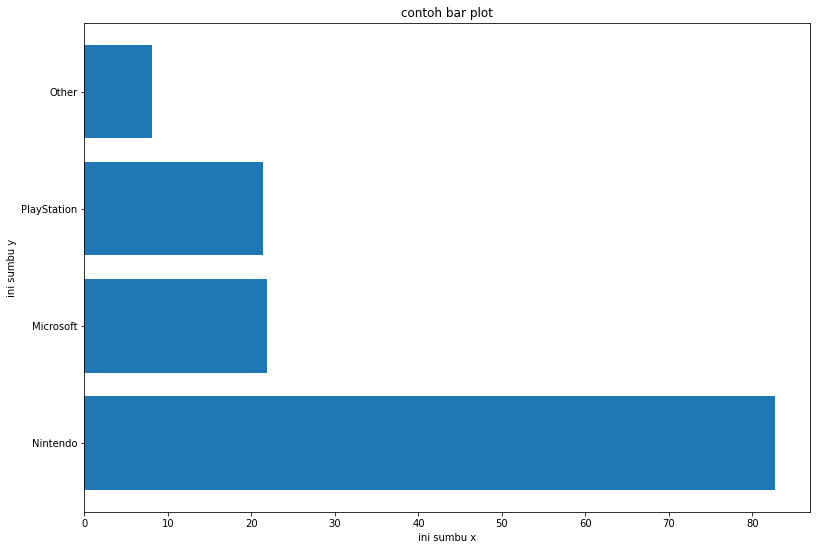

In [43]:
plt.figure(figsize=(13,9))
plt.barh(dfbersih['pabrik'],dfbersih['Global_Sales'],
       linewidth=3,)
plt.title('contoh bar plot')
plt.xlabel('ini sumbu x')
plt.ylabel('ini sumbu y')
plt.show()

In [44]:
import seaborn as sns
import numpy as np

In [45]:
dfbersih.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pabrik
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo


# highest selling platform per year

In [46]:
pd.pivot_table(data=dfbersih,index='Year',columns=['pabrik'],values=['EU_Sales','Global_Sales'],aggfunc='max')

EU_Sales                            Global_Sales                 \
pabrik Microsoft Nintendo Other PlayStation    Microsoft Nintendo Other   
Year                                                                      
1980         NaN      NaN  0.26         NaN          NaN      NaN  4.31   
1981         NaN      NaN  0.24         NaN          NaN      NaN  4.50   
1982         NaN      NaN  0.45         NaN          NaN      NaN  7.81   
1983         NaN     0.12  0.07         NaN          NaN     3.20  1.31   
1984         NaN     0.63  0.01         NaN          NaN    28.31  0.27   
1985         NaN     3.58  0.03         NaN          NaN    40.24  0.45   
1986         NaN     0.93  0.02         NaN          NaN     6.51  0.37   
1987         NaN     0.50  0.04         NaN          NaN     4.38  0.65   
1988         NaN     3.44  0.03         NaN          NaN    17.28  0.51   
1989         NaN     2.71  0.02         NaN          NaN    30.26  0.47   
1990         NaN     3.75  0.55         NaN          NaN    20.61  2.60   
1991         NaN     0.91  0.91         NaN          NaN     4.61  4.34   
1992         NaN     2.04  1.20         NaN          NaN    11.18  6.03   
1993         NaN     2.15  0.36         NaN          NaN    10.55  1.50   
1994         NaN     1.71  2.79        0.30          NaN     9.30  3.61   
1995         NaN     0.74  2.27        1.44          NaN     5.15  4.21   
1996         NaN     8.89  1.69        2.35          NaN    31.37  5.12   
1997         NaN     2.01  1.25        3.87          NaN     8.09  4.12   
1998         NaN     5.04  0.61        2.43          NaN    14.64  2.42   
1999         NaN     6.18  0.98        3.42          NaN    23.10  1.94   
2000        0.21     1.56  1.18        2.10         0.99     6.39  2.99   
2001        1.30     1.64  1.04        5.09         6.43     5.49  7.07   
2002        1.04     3.90  1.56        5.49         3.02    15.85  6.31   
2003        0.59     1.25  1.77        2.83         2.49     5.20  6.95   
2004        1.53     3.11  6.21        3.02         8.49    10.49  6.28   
2005        0.61    11.00  0.92        2.83         2.02    24.76  1.69   
2006        1.90    29.02  0.36        2.48         6.11    82.74  1.59   
2007        2.83     8.03  1.52        2.30        12.14    22.72  4.09   
2008        3.10    12.88  1.14        3.76        11.02    35.82  1.32   
2009        3.63    11.01  6.42        3.69        13.51    33.00  8.11   
2010        4.94     3.53  1.68        4.88        21.82    15.32  4.83   
2011        4.28     3.91  2.09        5.82        14.76    12.21  3.88   
2012        4.30     3.07  2.15        5.88        13.73     9.82  5.20   
2013        5.31     4.05  0.86        9.27        16.38    14.35  1.67   
2014        2.02     3.37  1.72        5.81         5.13    11.33  2.97   
2015        2.11     1.15  0.64        6.06         7.30     4.57  1.23   
2016        1.26     0.30  0.18        3.75         2.01     1.27  0.43   
2017         NaN      NaN   NaN        0.00          NaN      NaN   NaN   
2020         NaN     0.00   NaN         NaN          NaN     0.29   NaN   

                    
pabrik PlayStation  
Year                
1980           NaN  
1981           NaN  
1982           NaN  
1983           NaN  
1984           NaN  
1985           NaN  
1986           NaN  
1987           NaN  
1988           NaN  
1989           NaN  
1990           NaN  
1991           NaN  
1992           NaN  
1993           NaN  
1994          1.27  
1995          3.84  
1996          6.82  
1997         10.95  
1998          7.16  
1999          9.49  
2000          5.30  
2001         14.98  
2002         16.15  
2003          7.20  
2004         20.81  
2005          7.72  
2006          5.95  
2007          6.72  
2008         10.57  
2009         10.69  
2010         12.73  
2011         13.46  
2012         14.03  
2013         21.40  
2014         11.98  
2015         14.24  
2016          4.77  
2017          0.0

- dari data diatas ada beberapa penjualan yang nan dikarenakan di tahun tersebut platform itu belum mengeluarkan seri games

In [47]:
tables = dfbersih.pivot_table(values='Global_Sales', index='pabrik', columns='Year')
tables.columns = tables.columns.astype(int)
gamess = tables.idxmax()
saless = tables.max()
yearss = tables.columns
datas = pd.concat([gamess, saless], axis=1)
datas.columns = ['Game', 'Global Sales']
datas

,Game,Global Sales
Year,,
1980,Other,1.264444
1981,Other,0.777609
1982,Other,0.801667
1983,Nintendo,1.826667
1984,Nintendo,3.853077
1985,Nintendo,4.455000
1986,Nintendo,1.916316
1987,Nintendo,1.976000
1988,Nintendo,3.870000


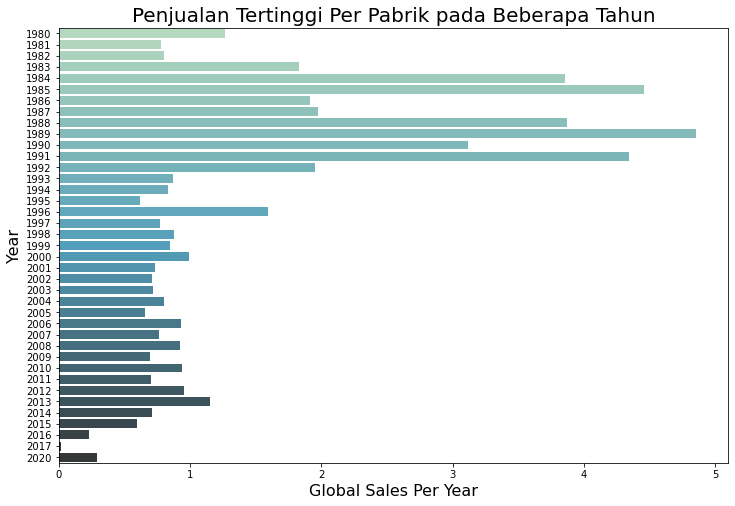

In [48]:
colorss = sns.color_palette("GnBu_d", len(yearss))
plt.figure(figsize=(12,8))
axs = sns.barplot(y = yearss , x = 'Global Sales', data=datas, orient='h', palette=colorss)
axs.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
axs.set_ylabel(ylabel='Year', fontsize=16)
axs.set_title(label='Penjualan Tertinggi Per Pabrik pada Beberapa Tahun', fontsize=20)
plt.show();

# mengamati trend penjualan pada platform yang dibuat pabrik dalam 10 tahun terakhir

In [49]:
before2011=dfbersih[(dfbersih["Year"]>=2005) & (dfbersih["Year"]<2011)].groupby("pabrik")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

In [50]:
after2011=dfbersih[(dfbersih["Year"]>=2011) & (dfbersih["Year"]<2017)].groupby("pabrik")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

In [51]:
combined=pd.merge(before2011, after2011, on="pabrik")
combined=combined.rename(index=str, columns={"Global_Sales_x": "2005-2010 Sales", "Global_Sales_y": "2011-2016 Sales"})

In [52]:
combined.head()

,pabrik,2005-2010 Sales,2011-2016 Sales
0,Nintendo,1609.09,470.03
1,PlayStation,1172.73,827.30
2,Microsoft,643.75,526.96
3,Other,110.39,95.48


In [53]:
import seaborn as sns

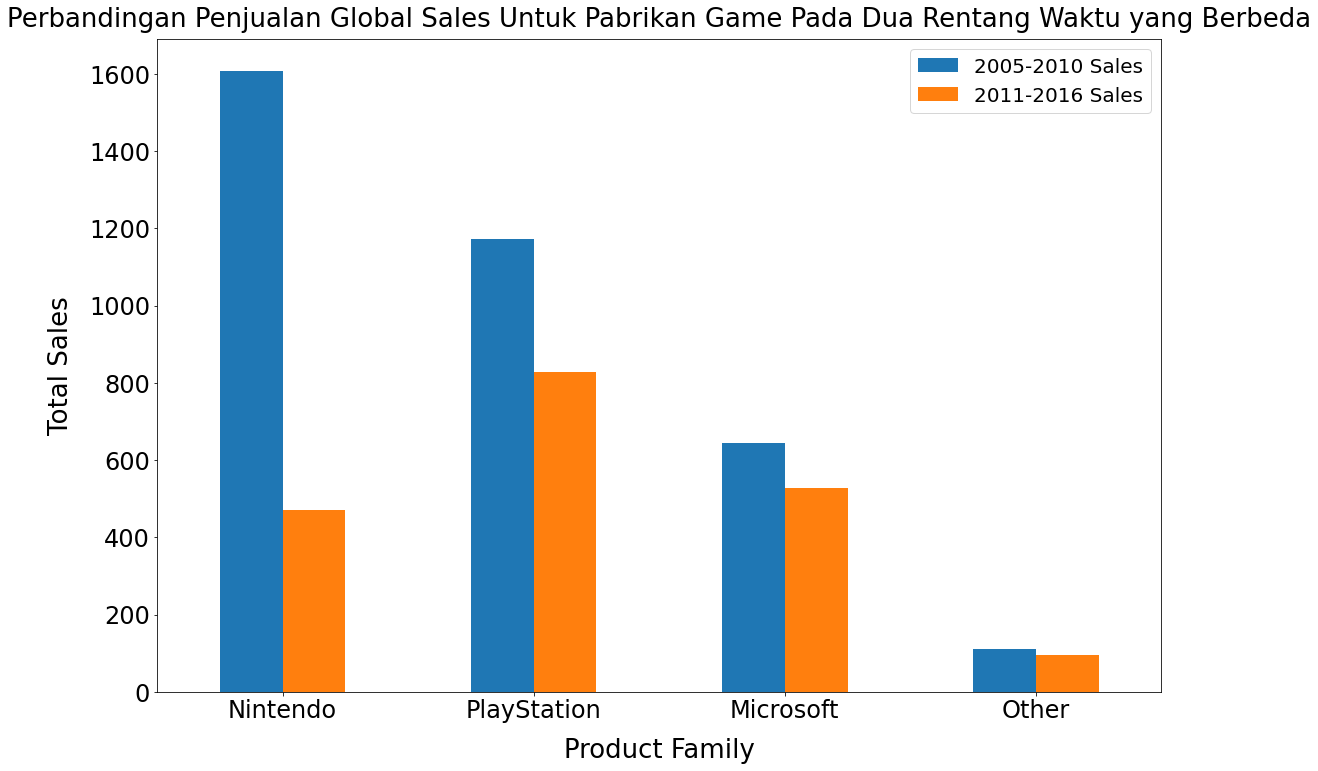

In [54]:
combined.set_index('pabrik')[['2005-2010 Sales', '2011-2016 Sales']].plot(kind='bar', figsize=(18, 12))
plt.xticks(rotation=0)#ngerotasi tulisan
plt.title("Perbandingan Penjualan Global Sales Untuk Pabrikan Game Pada Dua Rentang Waktu yang Berbeda", fontsize=26, y=1.01)
plt.xlabel("Product Family", fontsize=26, labelpad=15)
plt.ylabel("Total Sales", fontsize=26, labelpad=15)
plt.yticks(fontsize = 24 )
plt.xticks(fontsize = 24 )

plt.legend(fontsize=20);

# Penjualan Publisher Menurut Genre

In [55]:
crosstab_genpub = pd.crosstab(dfbersih['Publisher'], dfbersih['Genre'])
crosstab_genpub.head(10)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
10TACLE Studios,0,1,0,0,0,1,0,0,0,0,0,1
1C Company,0,0,0,0,0,0,1,1,0,0,0,1
20th Century Fox Video Games,4,0,0,0,0,0,0,0,1,0,0,0
2D Boy,0,0,0,0,0,1,0,0,0,0,0,0
3DO,17,3,1,0,1,1,0,1,5,0,6,1
49Games,0,0,0,0,0,0,0,0,0,0,1,0
505 Games,21,7,11,31,6,15,2,10,18,41,27,3
5pb,5,49,1,0,0,0,0,1,3,2,0,0
7G//AMES,0,0,0,1,0,1,0,0,0,2,0,0


In [56]:
crosstab_genpub

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
10TACLE Studios,0,1,0,0,0,1,0,0,0,0,0,1
1C Company,0,0,0,0,0,0,1,1,0,0,0,1
20th Century Fox Video Games,4,0,0,0,0,0,0,0,1,0,0,0
2D Boy,0,0,0,0,0,1,0,0,0,0,0,0
3DO,17,3,1,0,1,1,0,1,5,0,6,1
49Games,0,0,0,0,0,0,0,0,0,0,1,0
505 Games,21,7,11,31,6,15,2,10,18,41,27,3
5pb,5,49,1,0,0,0,0,1,3,2,0,0
7G//AMES,0,0,0,1,0,1,0,0,0,2,0,0


In [57]:
crosstab_genpub['Total'] = crosstab_genpub.sum(axis=1)
crosstab_genpub.head(30)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Publisher,,,,,,,,,,,,,
10TACLE Studios,0,1,0,0,0,1,0,0,0,0,0,1,3
1C Company,0,0,0,0,0,0,1,1,0,0,0,1,3
20th Century Fox Video Games,4,0,0,0,0,0,0,0,1,0,0,0,5
2D Boy,0,0,0,0,0,1,0,0,0,0,0,0,1
3DO,17,3,1,0,1,1,0,1,5,0,6,1,36
49Games,0,0,0,0,0,0,0,0,0,0,1,0,1
505 Games,21,7,11,31,6,15,2,10,18,41,27,3,192
5pb,5,49,1,0,0,0,0,1,3,2,0,0,61
7G//AMES,0,0,0,1,0,1,0,0,0,2,0,0,4


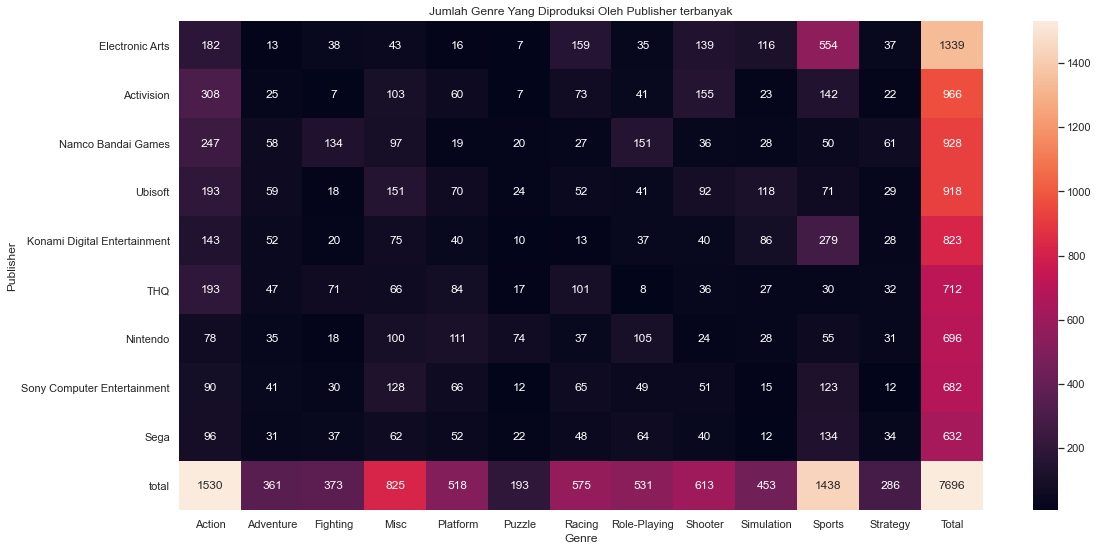

In [58]:
top10_platforms = crosstab_genpub[crosstab_genpub['Total'] > 450].sort_values('Total', ascending = False)
top10_final = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns=['total']).T, ignore_index=False)

sns.set(font_scale=1)
plt.figure(figsize=(18,9))
sns.heatmap(top10_final, annot=True, vmax=top10_final.loc[:, :'Strategy'].values.max(), vmin=top10_final.loc[:, :'Strategy'].values.min(), fmt='d')
plt.xlabel('Genre')
plt.ylabel('Publisher')
plt.title('Jumlah Genre Yang Diproduksi Oleh Publisher terbanyak')
plt.show()

- dari sisi ini kita bisa melihat kolerasi, apakah kolerasi dalam hal jumlah
- dari sisi ini kita bisa mengetahui publisher yang cocok untuk menangani genre tertentu

## penjualan di beberapa wilayah
- dari ini kita bisa mengetahui untuk penjualan tertinggi publisher di beberapa wilayah

### Penjualan global sales publisher pada setiap tahun

In [59]:
crosstab_genpub = pd.crosstab(index=[dfbersih['Year'],dfbersih['pabrik'],dfbersih['Publisher']],columns='Global Sales',values=df['Global_Sales'],aggfunc='mean').sort_values('Global Sales', ascending = False)
crosstab_genpub.head(10)

,,col_0,Global Sales
Year,pabrik,Publisher,
1985,Nintendo,Nintendo,7.135714
1989,Nintendo,Nintendo,7.097778
1988,Nintendo,Nintendo,6.073333
2006,PlayStation,RedOctane,5.120000
1996,Other,Microsoft Game Studios,5.120000
1990,Nintendo,Nintendo,5.070000
1984,Nintendo,Nintendo,5.062222
2002,PlayStation,Take-Two Interactive,5.000000
2004,PlayStation,Take-Two Interactive,4.542000


In [60]:
dfbersih['Year'].dtype

dtype('int64')

In [61]:
dfbersih['Year'] = dfbersih["Year"].astype(int)

/Users/risyad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
dfbersih.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pabrik
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo


## Penjualan europa sales publisher pada setiap tahun

In [63]:
crosstab_genpub = pd.crosstab(index=[dfbersih['Year'],dfbersih['pabrik'],dfbersih['Publisher']],columns='Europa Sales',values=df['EU_Sales'],aggfunc='sum').sort_values('Europa Sales', ascending = False)
crosstab_genpub.head(10)

,,col_0,Europa Sales
Year,pabrik,Publisher,
2006,Nintendo,Nintendo,59.97
2005,Nintendo,Nintendo,41.26
2009,Nintendo,Nintendo,36.18
2007,Nintendo,Nintendo,32.81
2008,Nintendo,Nintendo,25.13
2002,PlayStation,Electronic Arts,16.57
2010,Nintendo,Nintendo,16.52
1996,Nintendo,Nintendo,16.31
2013,Nintendo,Nintendo,16.21


## Penjualan Japan sales publisher pada setiap tahun

In [64]:
crosstab_genpub = pd.crosstab(index=[dfbersih['Year'],dfbersih['pabrik'],dfbersih['Publisher']],columns='Japan Sales',values=df['JP_Sales'],aggfunc='sum').sort_values('Japan Sales', ascending = False)
crosstab_genpub.head(10)

,,col_0,Japan Sales
Year,pabrik,Publisher,
2006,Nintendo,Nintendo,36.68
2009,Nintendo,Nintendo,29.82
2005,Nintendo,Nintendo,27.72
1996,Nintendo,Nintendo,21.14
2007,Nintendo,Nintendo,19.98
2008,Nintendo,Nintendo,19.96
2012,Nintendo,Nintendo,18.56
2010,Nintendo,Nintendo,16.30
2014,Nintendo,Nintendo,16.12


## Penjualan North America sales publisher pada setiap tahun

In [65]:
crosstab_genpub = pd.crosstab(index=[dfbersih['Year'],dfbersih['pabrik'],dfbersih['Publisher']],columns='North America Sales',values=df['NA_Sales'],aggfunc='sum').sort_values('North America Sales', ascending = False)
crosstab_genpub.head(10)

,,col_0,North America Sales
Year,pabrik,Publisher,
2006,Nintendo,Nintendo,89.13
2009,Nintendo,Nintendo,53.15
2007,Nintendo,Nintendo,42.77
1989,Nintendo,Nintendo,39.81
2005,Nintendo,Nintendo,39.56
2008,Nintendo,Nintendo,38.83
1996,Nintendo,Nintendo,34.54
1999,Nintendo,Nintendo,34.18
2010,Microsoft,Microsoft Game Studios,32.85


## Penjualan Other sales publisher pada setiap tahun

In [66]:
crosstab_genpub = pd.crosstab(index=[dfbersih['Year'],dfbersih['pabrik'],dfbersih['Publisher']],columns='Other Sales',values=df['Other_Sales'],aggfunc='sum').sort_values('Other Sales', ascending = False)
crosstab_genpub.head(10)

col_0                                         Other Sales
Year pabrik      Publisher                               
2006 Nintendo    Nintendo                           18.12
2004 PlayStation Take-Two Interactive               10.81
                 Sony Computer Entertainment        10.77
2005 Nintendo    Nintendo                            9.91
2009 Nintendo    Nintendo                            9.71
2007 PlayStation Electronic Arts                     9.53
     Nintendo    Nintendo                            8.60
     PlayStation Sony Computer Entertainment         8.28
2009 PlayStation Sony Computer Entertainment         7.93
2008 PlayStation Electronic Arts                     7.86

# Video Games yang Paling Laris Setiap Tahun

In [67]:
dfbersih['Genre'].dtype

dtype('O')

## global sales

In [81]:
table = dfbersih.pivot_table(values='Global_Sales', index=[dfbersih['Name'],dfbersih['Genre']], columns=dfbersih['Year'])
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Nama Game dan Genre', 'Global Sales']
data

,Nama Game dan Genre,Global Sales
Year,,
1980,"(Asteroids, Shooter)",4.310
1981,"(Pitfall!, Platform)",4.500
1982,"(Pac-Man, Puzzle)",7.810
1983,"(Baseball, Sports)",3.200
1984,"(Duck Hunt, Shooter)",28.310
1985,"(Super Mario Bros., Platform)",40.240
1986,"(The Legend of Zelda, Action)",6.510
1987,"(Zelda II: The Adventure of Link, Adventure)",4.380
1988,"(Super Mario Bros. 3, Platform)",17.280


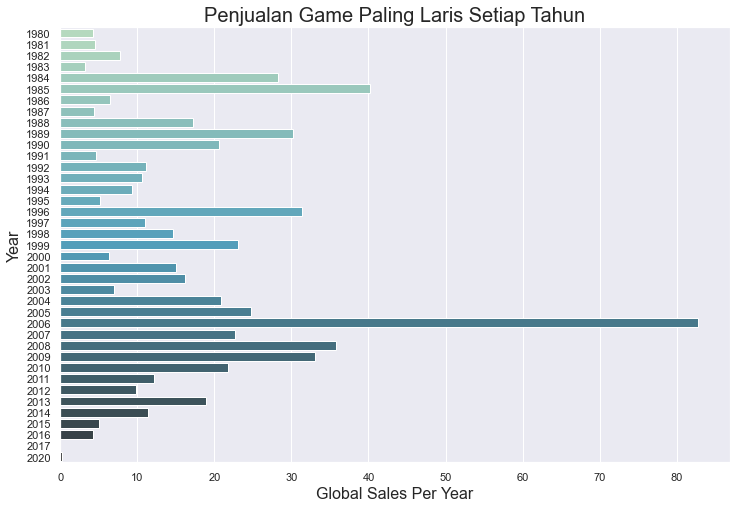

In [69]:
colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Penjualan Game Paling Laris Setiap Tahun', fontsize=20)
plt.show();

## NA Sales

                                           Game  North America Sales
Year                                                                
1980                                  Asteroids                 4.00
1981                                   Pitfall!                 4.21
1982                                    Pac-Man                 7.28
1983                   Pitfall II: Lost Caverns                 1.22
1984                                  Duck Hunt                26.93
1985                          Super Mario Bros.                29.08
1986                        The Legend of Zelda                 3.74
1987            Zelda II: The Adventure of Link                 2.19
1988                        Super Mario Bros. 3                 9.54
1989                                     Tetris                23.20
1990                          Super Mario World                12.78
1991                         Sonic the Hedgehog                 3.03
1992         Super Mario Land 2: 6

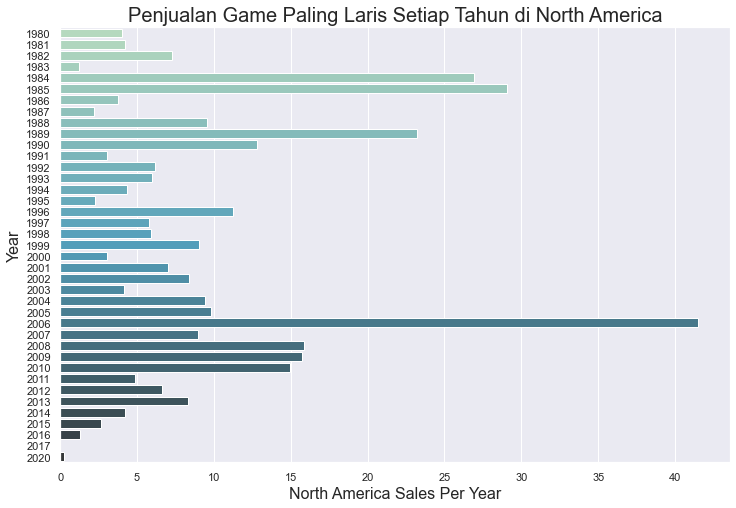

In [70]:
table = dfbersih.pivot_table(values='NA_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'North America Sales']
print(data)

colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'North America Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='North America Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Penjualan Game Paling Laris Setiap Tahun di North America', fontsize=20)
plt.show();

## Europe Sales

                                         Game  Europe Sales
Year                                                       
1980                                Asteroids         0.260
1981                                 Pitfall!         0.240
1982                                  Pac-Man         0.450
1983                              Mario Bros.         0.120
1984                                Duck Hunt         0.630
1985                        Super Mario Bros.         3.580
1986                      The Legend of Zelda         0.930
1987          Zelda II: The Adventure of Link         0.500
1988                      Super Mario Bros. 3         3.440
1989                         Super Mario Land         2.710
1990                        Super Mario World         3.750
1991                       Sonic the Hedgehog         0.910
1992       Super Mario Land 2: 6 Golden Coins         2.040
1993                    Super Mario All-Stars         2.150
1994                      Donkey Kong Co

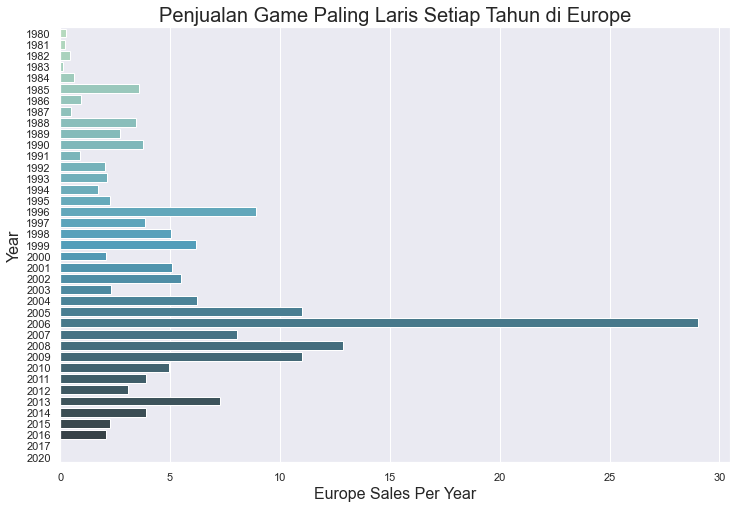

In [71]:
table = dfbersih.pivot_table(values='EU_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Europe Sales']
print(data)

colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'Europe Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Europe Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Penjualan Game Paling Laris Setiap Tahun di Europe', fontsize=20)
plt.show();

## JP_Sales

                                                  Game  Japan Sales
Year                                                               
1980                                         Asteroids         0.00
1981                                Adventures of Tron         0.00
1982                                      Action Force         0.00
1983                                          Baseball         2.35
1984                                              Golf         2.46
1985                                 Super Mario Bros.         6.81
1986                Super Mario Bros.: The Lost Levels         2.65
1987                                 Dragon Warrior II         2.41
1988                               Super Mario Bros. 3         3.84
1989                                            Tetris         4.22
1990                                 Super Mario World         3.54
1991                                  Final Fantasy II         1.33
1992                                  Super Mari

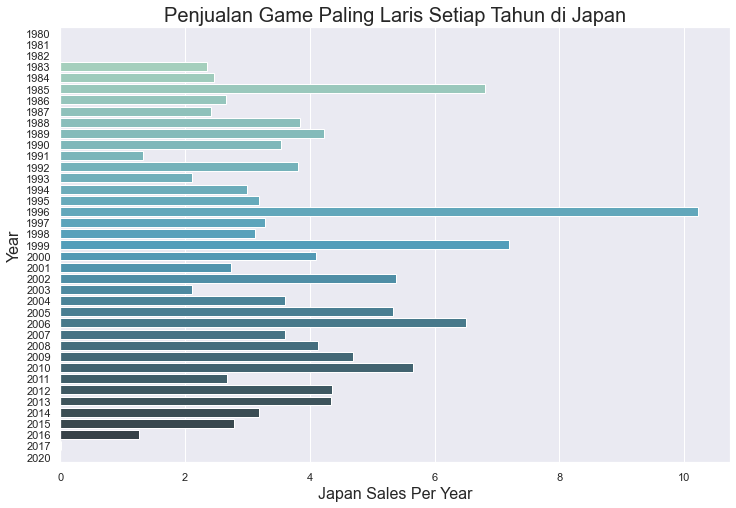

In [72]:
table = dfbersih.pivot_table(values='JP_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Japan Sales']
print(data)

colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'Japan Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Japan Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Penjualan Game Paling Laris Setiap Tahun di Japan', fontsize=20)
plt.show();

## Other Sales

                                         Game  Other Sales
Year                                                      
1980                                Asteroids        0.050
1981                                 Pitfall!        0.050
1982                                  Pac-Man        0.080
1983                                 Baseball        0.020
1984                                Duck Hunt        0.470
1985                        Super Mario Bros.        0.770
1986                           Dragon Warrior        1.510
1987          Zelda II: The Adventure of Link        0.080
1988                      Super Mario Bros. 3        0.460
1989                                   Tetris        0.580
1990                        Super Mario World        0.550
1991                       Sonic the Hedgehog        0.130
1992       Super Mario Land 2: 6 Golden Coins        0.290
1993                    Super Mario All-Stars        0.290
1994                              Donkey Kong        0.3

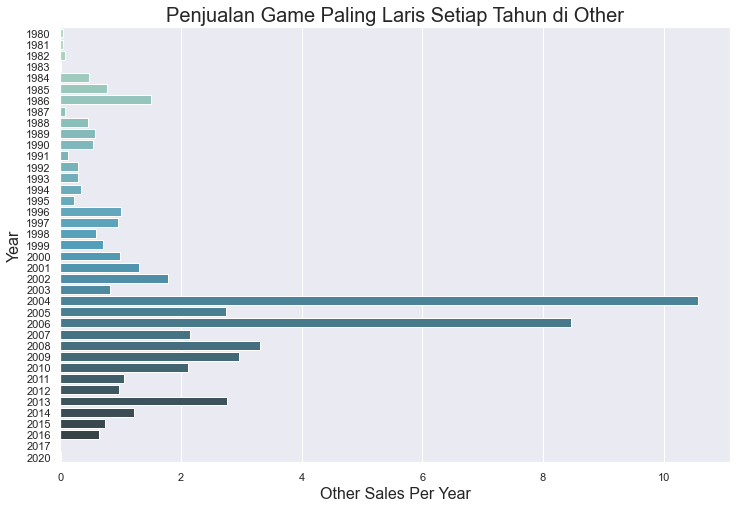

In [73]:
table = dfbersih.pivot_table(values='Other_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Other Sales']
print(data)

colors = sns.color_palette("GnBu_d", len(years))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = years , x = 'Other Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Other Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Penjualan Game Paling Laris Setiap Tahun di Other', fontsize=20)
plt.show();

# Kesimpulan
- game paling pantes di remake wii sports, yang bisa dilakukan di pabrikan nintendo, platform dan publisher nintendo, jika dilihat dari tren penjualan global sales pabrik nintendo merupakan yang terbanyak
- grand theft auto bisa diremake asalkan dijual dan dibuat oleh publisher nintendo,dikarenakan keduanya mempunyai kesamaan, yaitu penjualan pada other sales sangat laku. dan diproduksi oleh activision karena dilihat dari jumlahnya activision paling sering membuat game bergenre action

In [ ]:
1.game yang paling cocok untuk di remake adalah wii sports.
2. Rekomendasi untuk Publisher dan Platform yang cocok untuk membuat ulang game 
tersebut adalah Platform Nintendo dan Publisher Nintendo.
3.GTA (Grand Theft Auto) dapat di remake dengan saran agar dibuat oleh Publisher Nintendo
dan produksi dilakukan oleh activision.